In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Input
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score

In [2]:
train_data_dir = r"C:\Users\dhanu\Downloads\AIML DATA SET"
test_data_dir = r"C:\Users\dhanu\Downloads\aiml dataset\test"

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 18000 images belonging to 6 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(128, 128),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 3600 images belonging to 6 classes.


In [7]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(128,128, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
])

C:\Users\dhanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Define input shape
input_shape = (128, 128, 1)

# Input layer
input_layer = Input(shape=input_shape)

# Convolutional layer
conv1 = Conv2D(32, kernel_size=(3, 3))(input_layer)

# Max pooling layer
maxpool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

# Flatten layer
flatten = Flatten()(maxpool1)

# Fully connected layer
dense1 = Dense(128, activation='relu')(flatten)

# Output layer
output_layer = Dense(6, activation='softmax')(dense1)
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 127008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      16,257,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,258,246 (62.02 MB)

 Trainable params: 16,258,246 (62.02 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=5, validation_data=test_generator)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy}")

# Save the model
model.save("hand_gesture_model.h5")

Epoch 1/5


C:\Users\dhanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


563/563 ━━━━━━━━━━━━━━━━━━━━ 305s 533ms/step - accuracy: 0.8502 - loss: 0.6832 - val_accuracy: 0.9975 - val_loss: 0.0085
Epoch 2/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 101s 178ms/step - accuracy: 0.9995 - loss: 0.0048 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 3/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 109s 192ms/step - accuracy: 1.0000 - loss: 9.1288e-04 - val_accuracy: 0.9997 - val_loss: 0.0016
Epoch 4/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 105s 185ms/step - accuracy: 1.0000 - loss: 4.3494e-04 - val_accuracy: 1.0000 - val_loss: 4.6481e-04
Epoch 5/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 105s 186ms/step - accuracy: 1.0000 - loss: 1.8149e-04 - val_accuracy: 1.0000 - val_loss: 4.8367e-04
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 1.0000 - loss: 4.4377e-04


Test Accuracy: 1.0


113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 1.0000 - loss: 4.7835e-04
Test Accuracy: 1.0
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step
Precision: 0.16055555555555556, Recall: 0.16055555555555556


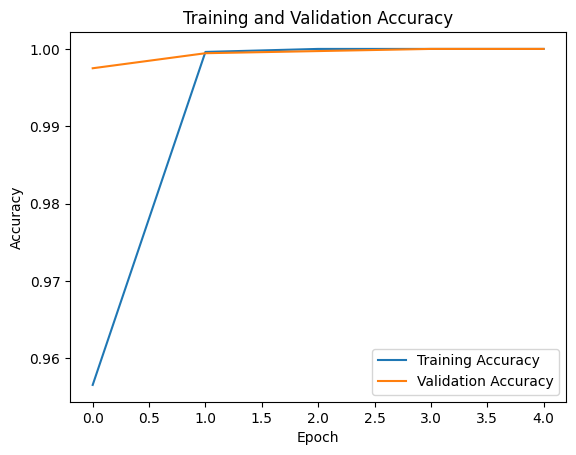

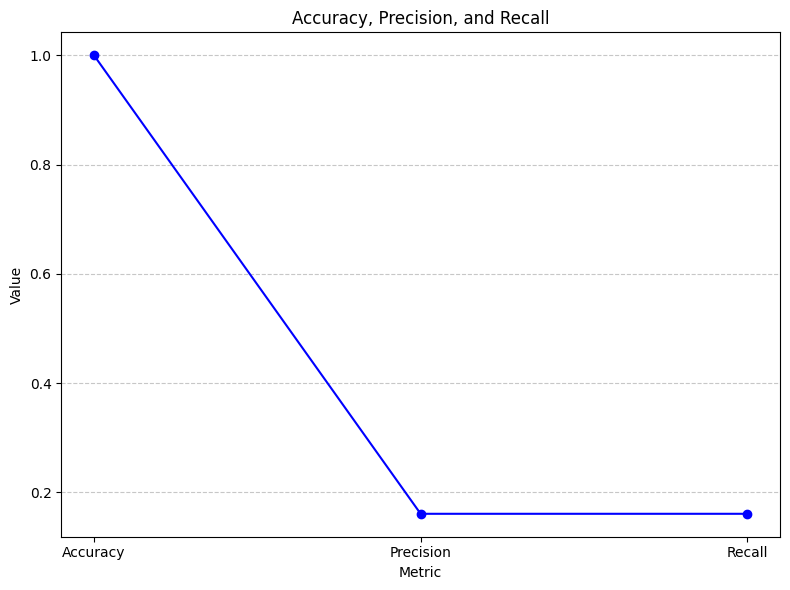

In [10]:
from sklearn.metrics import precision_score, recall_score

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy}")

# Generate predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Compute precision and recall
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
print(f"Precision: {precision}, Recall: {recall}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot precision and recall
plt.figure(figsize=(8, 6))
plt.plot(['Accuracy', 'Precision', 'Recall'], [accuracy, precision, recall], marker='o', color='blue', linestyle='-')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Accuracy, Precision, and Recall')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


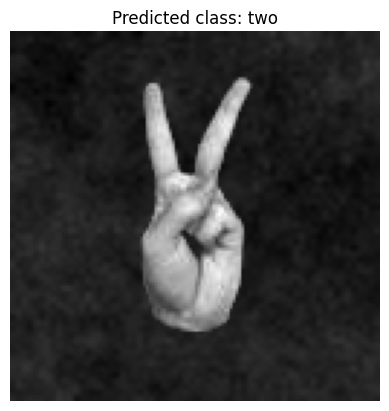

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


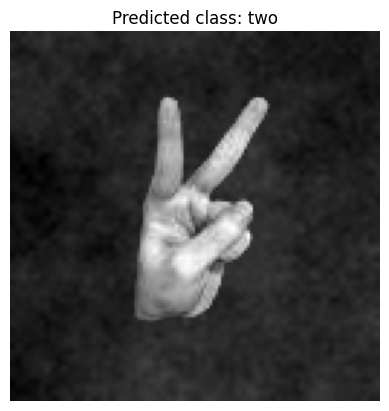

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


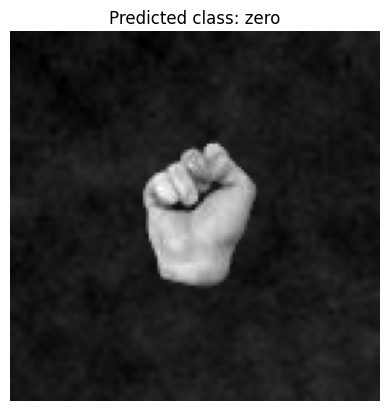

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


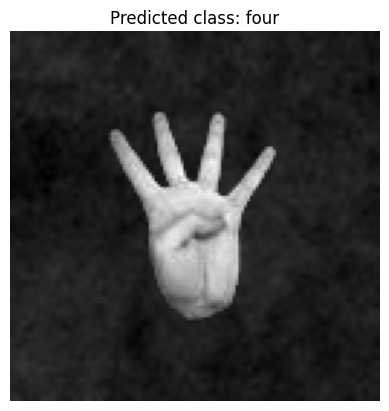

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


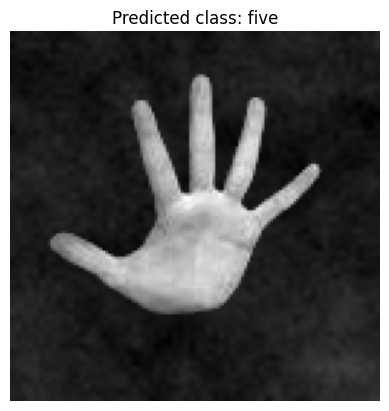

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


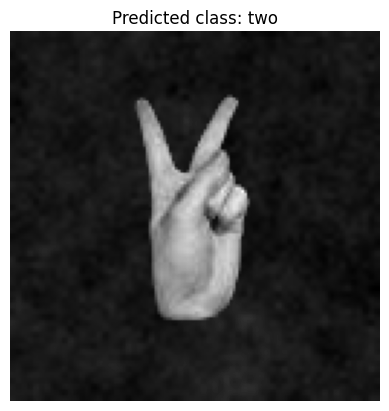

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


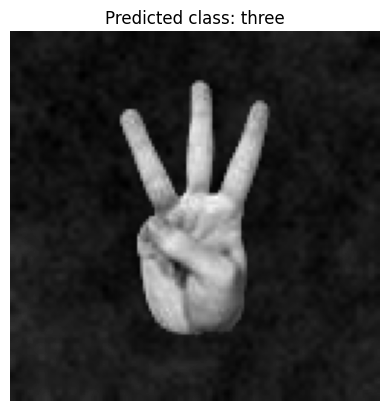

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


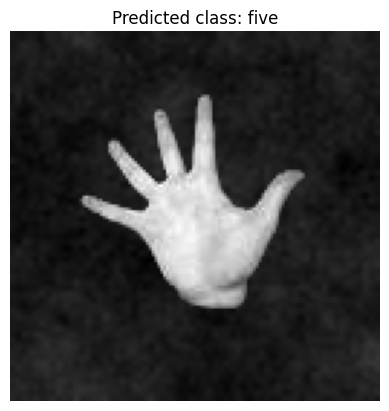

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


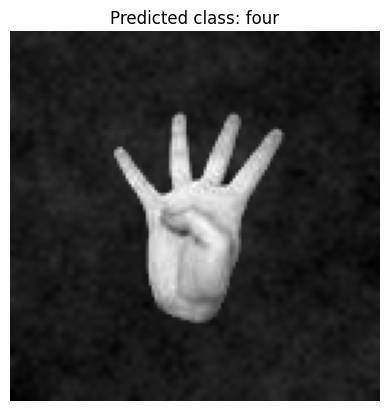

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


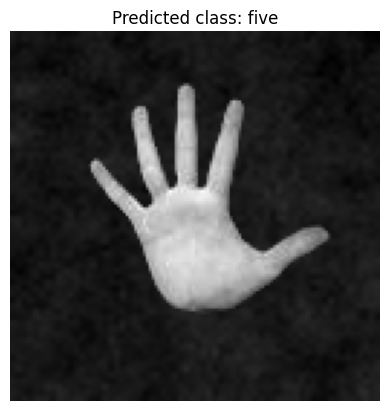

In [11]:
from tensorflow.keras.preprocessing import image

# Directory containing images
image_dir = r"C:\Users\dhanu\Downloads\test 2 aiml"

# List all image files in the directory with the ".png" extension
image_files = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.lower().endswith(".png")]

# Function to make predictions on an image
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(128, 128), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Rescale pixel values to [0, 1]
    predictions = model.predict(img_array)
    class_names = train_generator.class_indices.keys()
    predicted_class_index = np.argmax(predictions)
    predicted_class = list(class_names)[predicted_class_index]
    return predicted_class, img_array

# Check if there are any images in the directory
if len(image_files) == 0:
    print("No image files found in the directory.")
else:
    # Loop through the first 10 images and make predictions
    for image_file in image_files[:10]:
        predicted_class, img_array = predict_image(image_file)

        # Display the image
        plt.imshow(img_array.squeeze(), cmap='gray')
        plt.axis('off')
        plt.title(f"Predicted class: {predicted_class}")
        plt.show()

In [12]:
train_directory = r"C:\Users\dhanu\Downloads\AIML DATA SET"
test_directory = r"C:\Users\dhanu\Downloads\aiml dataset\test"

# Define batch size and image dimensions
batch_size = 32
image_size = (128, 128)

# Define data augmentation settings (optional)
train_augmentation = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    # Add other augmentation layers as needed
])

In [13]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_directory,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical',
    seed=123,  # Set seed for reproducibility
    validation_split=0.2,
    subset='training',
    shuffle=True,
    interpolation='bilinear',  # optional: specify interpolation method
    follow_links=False,  # optional: whether to follow symbolic links
).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_directory,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical',
    seed=123,  # Set seed for reproducibility
    validation_split=0.2,
    subset='validation',
    shuffle=True,
    interpolation='bilinear',  # optional: specify interpolation method
    follow_links=False,  # optional: whether to follow symbolic links
).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_directory,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical',
    seed=123,  # Set seed for reproducibility
    shuffle=False,
    interpolation='bilinear',  # optional: specify interpolation method
    follow_links=False,  # optional: whether to follow symbolic links
).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

Found 18000 files belonging to 6 classes.
Using 14400 files for training.
Found 18000 files belonging to 6 classes.
Using 3600 files for validation.
Found 3600 files belonging to 6 classes.


In [14]:
X_train, y_train = next(iter(train_dataset))
X_test, y_test = next(iter(test_dataset))
y_train = tf.argmax(y_train, axis=1).numpy()

# Flatten the image data
X_train_flat = tf.reshape(X_train, (X_train.shape[0], -1))
X_test_flat = tf.reshape(X_test, (X_test.shape[0], -1))

In [28]:
random_forest = RandomForestClassifier()

# Train the model
random_forest.fit(X_train_flat, y_train)

# Save the model
joblib.dump(random_forest, 'random_forest_model.pkl')

# Convert y_test to multiclass format
y_test_multiclass = np.argmax(y_test, axis=1)

# Evaluate the model
y_pred_rf = random_forest.predict(X_test_flat)
accuracy_rf = accuracy_score(y_test_multiclass, y_pred_rf)
precision_rf = precision_score(y_test_multiclass, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test_multiclass, y_pred_rf, average='weighted', zero_division=0)
print(f"Random Forest - Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f},Recall:{recall_rf:.4f}")

Random Forest - Accuracy: 0.9688, Precision: 1.0000,Recall:0.9688


In [29]:
# Define and train the Support Vector Machine (SVM) model
svm_model = SVC()
svm_model.fit(X_train_flat, y_train)

# Save the SVM model
joblib.dump(svm_model, 'svm_model.pkl')

# Evaluate the SVM model
y_pred_svm = svm_model.predict(X_test_flat)
accuracy_svm = accuracy_score(y_test_multiclass, y_pred_svm)
precision_svm = precision_score(y_test_multiclass, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test_multiclass, y_pred_svm, average='weighted', zero_division=0)
print(f"SVM - Accuracy: {accuracy_svm:.4f}, Precision: {precision_svm:.4f},Recall:{recall_svm:.4f}")

SVM - Accuracy: 0.8750, Precision: 1.0000,Recall:0.8750


In [30]:
# Define and train the K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_flat, y_train)

# Save the KNN model
joblib.dump(knn_model, 'knn_model.pkl')

# Convert y_test to multiclass format
y_test_multiclass = np.argmax(y_test, axis=1)

# Evaluate the KNN model
y_pred_knn = knn_model.predict(X_test_flat)
accuracy_knn = accuracy_score(y_test_multiclass, y_pred_knn)
precision_knn = precision_score(y_test_multiclass, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test_multiclass, y_pred_knn, average='weighted', zero_division=0)
print(f"KNN - Accuracy: {accuracy_knn:.4f}, Precision: {precision_knn:.4f},Recall:{recall_knn:.4f}")

KNN - Accuracy: 0.6562, Precision: 1.0000,Recall:0.6562


In [32]:
# Define and train the Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_flat, y_train)

# Save the Decision Tree model
joblib.dump(decision_tree, 'decision_tree_model.pkl')

# Convert y_test to multiclass format
y_test_multiclass = np.argmax(y_test, axis=1)

# Evaluate the Decision Tree model
y_pred_decision_tree = decision_tree.predict(X_test_flat)
accuracy_decision_tree = accuracy_score(y_test_multiclass, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test_multiclass, y_pred_decision_tree, average='weighted')
recall_decision_tree = recall_score(y_test_multiclass, y_pred_decision_tree, average='weighted', zero_division=0)
print(f"Decision Tree - Accuracy: {accuracy_decision_tree:.4f}, Precision: {precision_decision_tree:.4f},Recall:{recall_decision_tree:.4f}")

Decision Tree - Accuracy: 0.6875, Precision: 1.0000,Recall:0.6875


In [34]:
# Define and train the AdaBoost model
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)  # You can adjust the number of estimators as needed
adaboost.fit(X_train_flat, y_train)

# Save the AdaBoost model
joblib.dump(adaboost, 'adaboost_model.pkl')

# Evaluate the AdaBoost model
y_pred_adaboost = adaboost.predict(X_test_flat)
accuracy_adaboost = accuracy_score(y_test_multiclass, y_pred_adaboost)
precision_adaboost = precision_score(y_test_multiclass, y_pred_adaboost, average='weighted')
recall_adaboost = recall_score(y_test_multiclass, y_pred_adaboost, average='weighted', zero_division=0)
print(f"AdaBoost - Accuracy: {accuracy_adaboost:.4f}, Precision: {precision_adaboost:.4f},Recall:{recall_adaboost:.4f}")

C:\Users\dhanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Accuracy: 0.5625, Precision: 1.0000,Recall:0.5625


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
import joblib

# Define and train the Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression.fit(X_train_flat, y_train)

# Save the Logistic Regression model
joblib.dump(logistic_regression, 'logistic_regression_model.pkl')

# Evaluate the Logistic Regression model
y_pred_logistic_regression = logistic_regression.predict(X_test_flat)
accuracy_logistic_regression = accuracy_score(y_test_multiclass, y_pred_logistic_regression)
precision_logistic_regression = precision_score(y_test_multiclass, y_pred_logistic_regression, average='weighted')
recall_logistic_regression = recall_score(y_test_multiclass, y_pred_logistic_regression, average='weighted', zero_division=0)
print(f"Logistic Regression - Accuracy: {accuracy_logistic_regression:.4f}, Precision: {precision_logistic_regression:.4f},Recall:{recall_adaboost:.4f}")

Logistic Regression - Accuracy: 0.5625, Precision: 1.0000,Recall:0.5625


In [36]:
# Get the class labels for each model
svm_classes = svm_model.classes_
knn_classes = knn_model.classes_
decision_tree_classes = decision_tree.classes_
random_forest_classes = random_forest.classes_
adaboost_classes = adaboost.classes_
logistic_regression_classes = logistic_regression.classes_  # Adding Logistic Regression classes

# Print the class labels for each model
print("SVM Classes:", svm_classes)
print("k-NN Classes:", knn_classes)
print("Decision Tree Classes:", decision_tree_classes)
print("Random Forest Classes:", random_forest_classes)
print("AdaBoost Classes:", adaboost_classes)
print("Logistic Regression Classes:", logistic_regression_classes)  # Print Logistic Regression classes

SVM Classes: [0 1 2 3 4 5]
k-NN Classes: [0 1 2 3 4 5]
Decision Tree Classes: [0 1 2 3 4 5]
Random Forest Classes: [0 1 2 3 4 5]
AdaBoost Classes: [0 1 2 3 4 5]
Logistic Regression Classes: [0 1 2 3 4 5]


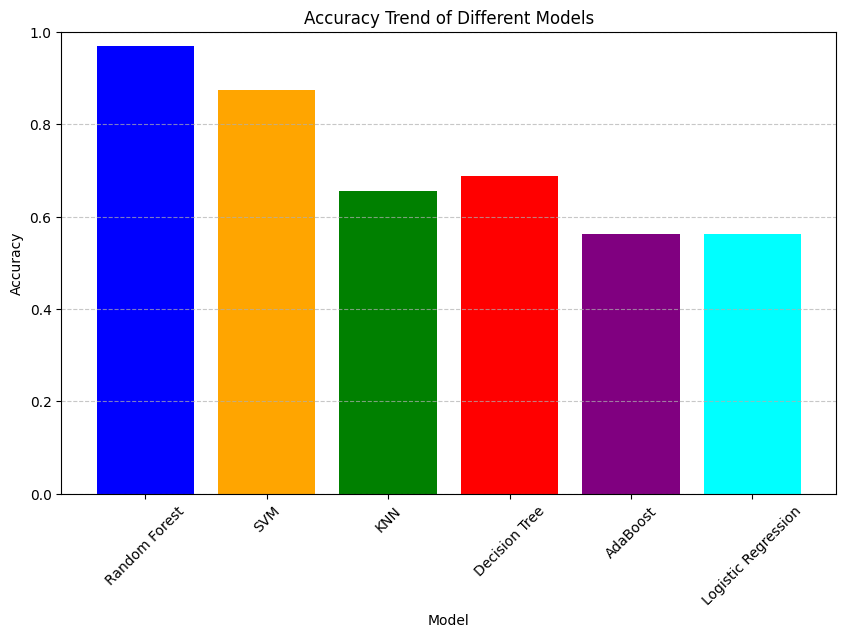

In [37]:
import matplotlib.pyplot as plt

# Define model names and their respective accuracies
model_names = ['Random Forest', 'SVM', 'KNN', 'Decision Tree', 'AdaBoost', 'Logistic Regression']
accuracies = [accuracy_rf, accuracy_svm, accuracy_knn, accuracy_decision_tree, accuracy_adaboost, accuracy_logistic_regression]

# Plotting the trend of accuracy for different models
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'cyan'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Trend of Different Models')
plt.ylim(0, 1)  # Set y-axis limit to 0 to 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

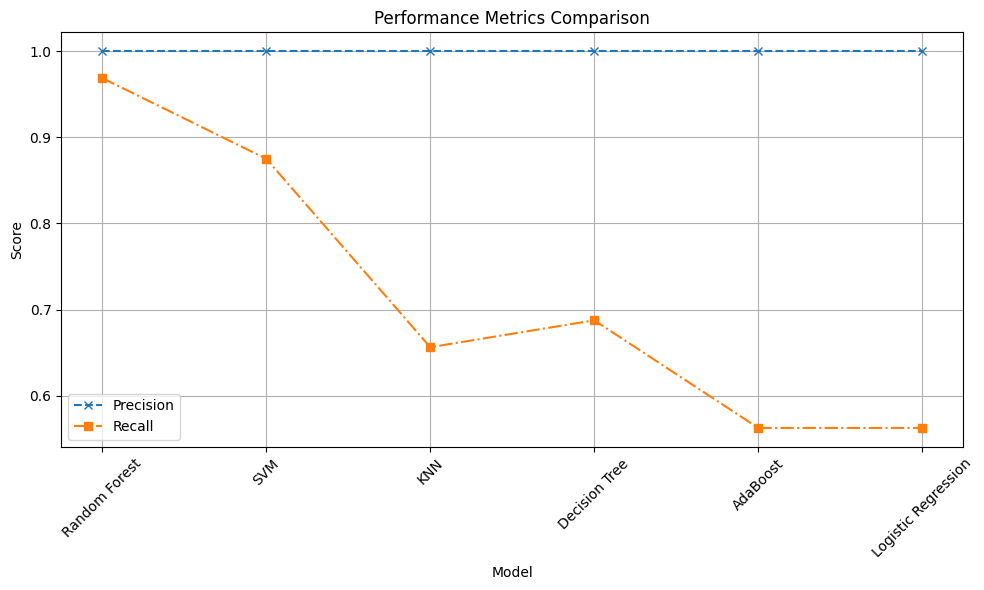

In [38]:
import matplotlib.pyplot as plt

# Define model names and their respective metrics
model_names = ['Random Forest', 'SVM', 'KNN', 'Decision Tree', 'AdaBoost', 'Logistic Regression']
precisions = [precision_rf, precision_svm, precision_knn, precision_decision_tree, precision_adaboost, precision_logistic_regression]
recalls = [recall_rf, recall_svm, recall_knn, recall_decision_tree, recall_adaboost, recall_logistic_regression]

# Plotting the trend of, precision, and recall for different models
plt.figure(figsize=(10, 6))

# Precision plot
plt.plot(model_names, precisions, marker='x', label='Precision', linestyle='--')
# Recall plot
plt.plot(model_names, recalls, marker='s', label='Recall', linestyle='-.')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

Random Forest - Accuracy: 0.9688, Precision: 1.0000, Recall: 0.9688


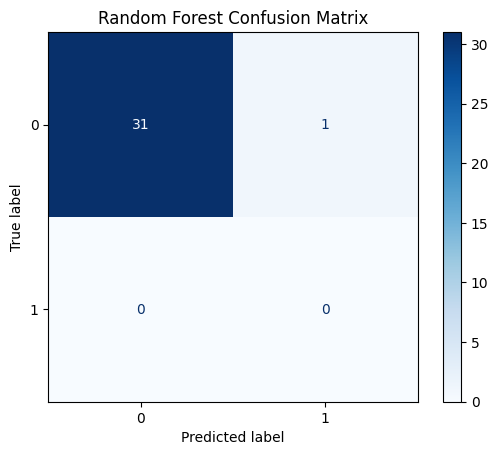

SVM - Accuracy: 0.8750, Precision: 1.0000, Recall: 0.8750


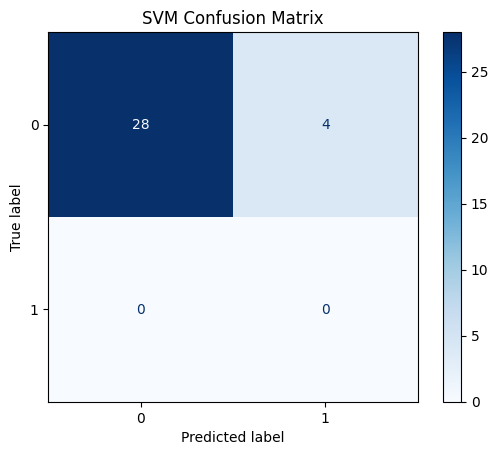

KNN - Accuracy: 0.6562, Precision: 1.0000, Recall: 0.6562


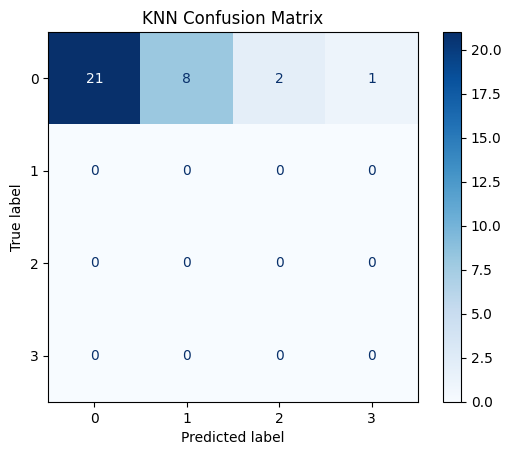

Decision Tree - Accuracy: 0.6875, Precision: 1.0000, Recall: 0.6875


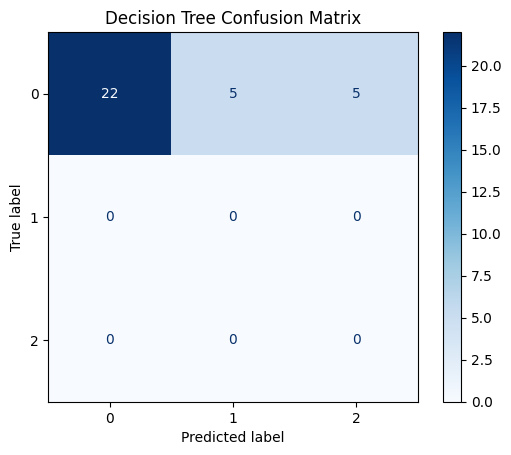

AdaBoost - Accuracy: 0.5625, Precision: 1.0000, Recall: 0.5625


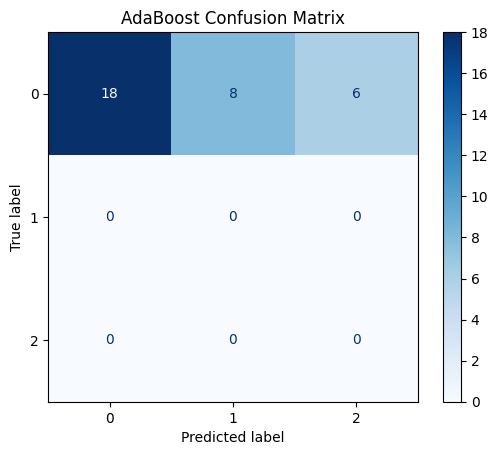

Logistic Regression - Accuracy: 0.5625, Precision: 1.0000, Recall: 0.5625


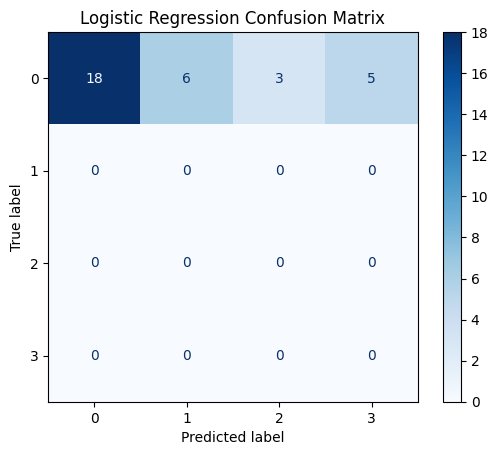

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test_multiclass, y_pred_rf)
precision_rf = precision_score(y_test_multiclass, y_pred_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test_multiclass, y_pred_rf, average='weighted', zero_division=0)
print(f"Random Forest - Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}")

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test_multiclass, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test_multiclass, y_pred_svm)
precision_svm = precision_score(y_test_multiclass, y_pred_svm, average='weighted', zero_division=0)
recall_svm = recall_score(y_test_multiclass, y_pred_svm, average='weighted', zero_division=0)
print(f"SVM - Accuracy: {accuracy_svm:.4f}, Precision: {precision_svm:.4f}, Recall: {recall_svm:.4f}")

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test_multiclass, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix")
plt.show()

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test_multiclass, y_pred_knn)
precision_knn = precision_score(y_test_multiclass, y_pred_knn, average='weighted', zero_division=0)
recall_knn = recall_score(y_test_multiclass, y_pred_knn, average='weighted', zero_division=0)
print(f"KNN - Accuracy: {accuracy_knn:.4f}, Precision: {precision_knn:.4f}, Recall: {recall_knn:.4f}")

# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test_multiclass, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title("KNN Confusion Matrix")
plt.show()

# Evaluate the Decision Tree model
accuracy_decision_tree = accuracy_score(y_test_multiclass, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test_multiclass, y_pred_decision_tree, average='weighted', zero_division=0)
recall_decision_tree = recall_score(y_test_multiclass, y_pred_decision_tree, average='weighted', zero_division=0)
print(f"Decision Tree - Accuracy: {accuracy_decision_tree:.4f}, Precision: {precision_decision_tree:.4f}, Recall: {recall_decision_tree:.4f}")

# Confusion Matrix for Decision Tree
cm_decision_tree = confusion_matrix(y_test_multiclass, y_pred_decision_tree)
disp_decision_tree = ConfusionMatrixDisplay(confusion_matrix=cm_decision_tree)
disp_decision_tree.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Evaluate the AdaBoost model
accuracy_adaboost = accuracy_score(y_test_multiclass, y_pred_adaboost)
precision_adaboost = precision_score(y_test_multiclass, y_pred_adaboost, average='weighted', zero_division=0)
recall_adaboost = recall_score(y_test_multiclass, y_pred_adaboost, average='weighted', zero_division=0)
print(f"AdaBoost - Accuracy: {accuracy_adaboost:.4f}, Precision: {precision_adaboost:.4f}, Recall: {recall_adaboost:.4f}")

# Confusion Matrix for AdaBoost
cm_adaboost = confusion_matrix(y_test_multiclass, y_pred_adaboost)
disp_adaboost = ConfusionMatrixDisplay(confusion_matrix=cm_adaboost)
disp_adaboost.plot(cmap=plt.cm.Blues)
plt.title("AdaBoost Confusion Matrix")
plt.show()

# Evaluate the Logistic Regression model
accuracy_logistic_regression = accuracy_score(y_test_multiclass, y_pred_logistic_regression)
precision_logistic_regression = precision_score(y_test_multiclass, y_pred_logistic_regression, average='weighted', zero_division=0)
recall_logistic_regression = recall_score(y_test_multiclass, y_pred_logistic_regression, average='weighted', zero_division=0)
print(f"Logistic Regression - Accuracy: {accuracy_logistic_regression:.4f}, Precision: {precision_logistic_regression:.4f}, Recall: {recall_logistic_regression:.4f}")

# Confusion Matrix for Logistic Regression
cm_logistic_regression = confusion_matrix(y_test_multiclass, y_pred_logistic_regression)
disp_logistic_regression = ConfusionMatrixDisplay(confusion_matrix=cm_logistic_regression)
disp_logistic_regression.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

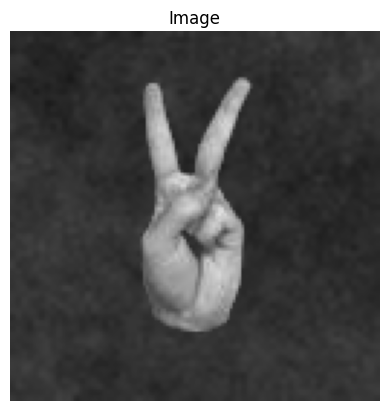

Image: c76403ab-cf44-4ee5-90f1-04f52b5afd9f_2L.png
SVM Prediction: 4
k-NN Prediction: 2
Decision Tree Prediction: 3
Random Forest Prediction: 2
AdaBoost Prediction: 4
Logistic Regression Prediction: 2



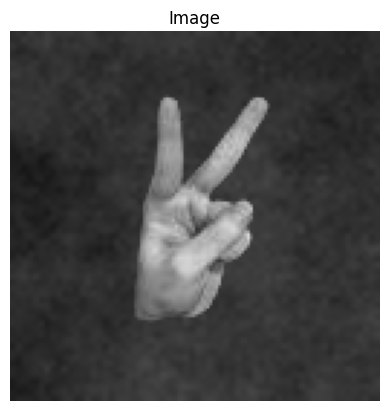

Image: c773d435-1c14-4900-9ec4-9d9b216e38f3_2L.png
SVM Prediction: 4
k-NN Prediction: 4
Decision Tree Prediction: 4
Random Forest Prediction: 4
AdaBoost Prediction: 4
Logistic Regression Prediction: 4



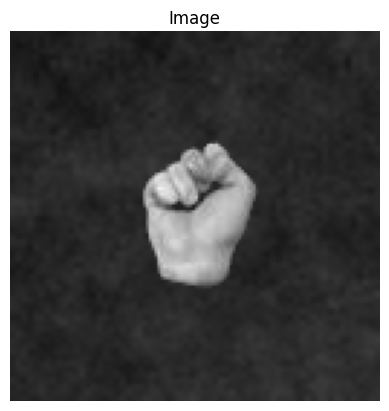

Image: c7934f3f-9ebc-4674-8c85-2ed117adedd6_0R.png
SVM Prediction: 2
k-NN Prediction: 5
Decision Tree Prediction: 5
Random Forest Prediction: 5
AdaBoost Prediction: 5
Logistic Regression Prediction: 5



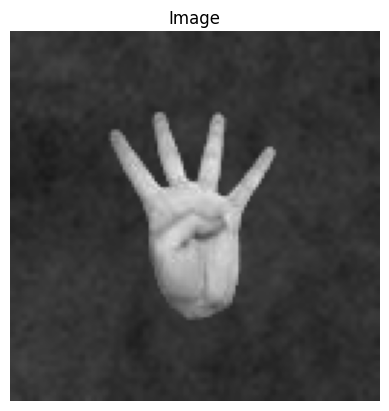

Image: c799e572-b3b5-40c3-b643-04e03d704c64_4L.png
SVM Prediction: 4
k-NN Prediction: 5
Decision Tree Prediction: 1
Random Forest Prediction: 1
AdaBoost Prediction: 4
Logistic Regression Prediction: 1



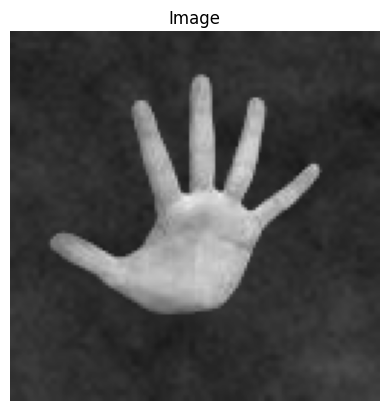

Image: c805522d-8c48-4f74-a51f-c1786c892c69_5L.png
SVM Prediction: 0
k-NN Prediction: 3
Decision Tree Prediction: 3
Random Forest Prediction: 0
AdaBoost Prediction: 2
Logistic Regression Prediction: 3



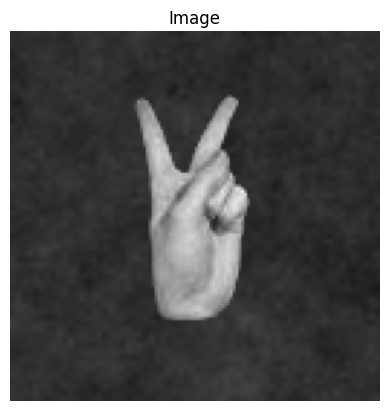

Image: c8068412-e11b-4f71-9f4a-0775ad5d1686_2L.png
SVM Prediction: 4
k-NN Prediction: 2
Decision Tree Prediction: 3
Random Forest Prediction: 4
AdaBoost Prediction: 4
Logistic Regression Prediction: 4



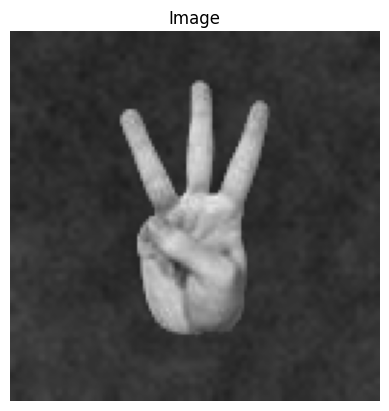

Image: c829e6d2-1752-4150-9028-2472da812528_3R.png
SVM Prediction: 3
k-NN Prediction: 3
Decision Tree Prediction: 3
Random Forest Prediction: 3
AdaBoost Prediction: 3
Logistic Regression Prediction: 3



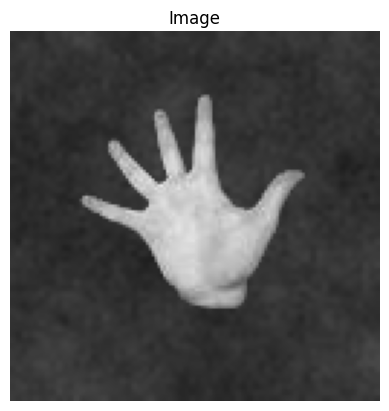

Image: c855a485-544f-489b-8276-29ca006b9acd_5R.png
SVM Prediction: 0
k-NN Prediction: 0
Decision Tree Prediction: 1
Random Forest Prediction: 0
AdaBoost Prediction: 4
Logistic Regression Prediction: 0



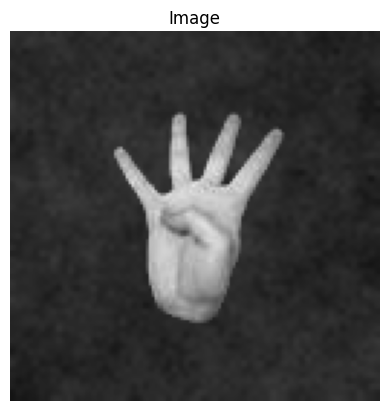

Image: c8591352-981e-4fdf-a1de-dc16e6ad446b_4R.png
SVM Prediction: 4
k-NN Prediction: 4
Decision Tree Prediction: 1
Random Forest Prediction: 4
AdaBoost Prediction: 4
Logistic Regression Prediction: 1



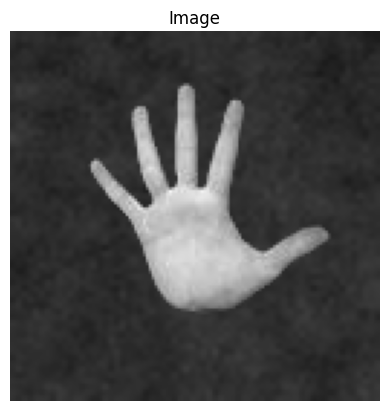

Image: c86772a2-1a55-4385-b34f-ea94478d6878_5R.png
SVM Prediction: 4
k-NN Prediction: 2
Decision Tree Prediction: 0
Random Forest Prediction: 0
AdaBoost Prediction: 0
Logistic Regression Prediction: 2



In [40]:
import cv2
import matplotlib.pyplot as plt

# Define the folder path containing the images
folder_path = r"C:\Users\dhanu\Downloads\test 2 aiml"

# Initialize a counter to keep track of the number of images processed
image_count = 0

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is a PNG image
    if filename.endswith(".png"):
        # Read the image
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        
        # Preprocess the image (resize to match model's input size and flatten)
        resized_image = cv2.resize(image, (128, 128))  # Resize to match model's input size
        flattened_image = resized_image.flatten()  # Flatten the resized image

        # Perform prediction using each model
        prediction_svm = svm_model.predict([flattened_image])[0]
        prediction_knn = knn_model.predict([flattened_image])[0]
        prediction_decision_tree = decision_tree.predict([flattened_image])[0]
        prediction_random_forest = random_forest.predict([flattened_image])[0]
        prediction_adaboost = adaboost.predict([flattened_image])[0]
        prediction_logistic_regression = logistic_regression.predict([flattened_image])[0]
        
        # Display the image
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title('Image')
        plt.show()
        
        # Print predictions
        print(f"Image: {filename}")
        print(f"SVM Prediction: {prediction_svm}")
        print(f"k-NN Prediction: {prediction_knn}")
        print(f"Decision Tree Prediction: {prediction_decision_tree}")
        print(f"Random Forest Prediction: {prediction_random_forest}")
        print(f"AdaBoost Prediction: {prediction_adaboost}")
        print(f"Logistic Regression Prediction: {prediction_logistic_regression}")
        print()
        
        # Increment the image counter
        image_count += 1
        
        # Check if 10 images have been processed, if yes, break the loop
        if image_count == 10:
            break